In [1]:
import pandas as pd


In [1]:
def motMetricsEnhancedCalculator(gtSource, tSource):
  # import required packages
  import motmetrics as mm
  import numpy as np
  
  # load ground truth
  gt = np.loadtxt(gtSource, delimiter=',')

  # load tracking output
  t = np.loadtxt(tSource, delimiter=',')

  # Create an accumulator that will be updated during each frame
  acc = mm.MOTAccumulator(auto_id=True)

  # Max frame number maybe different for gt and t files
  for frame in range(int(gt[:,0].max())):
    frame += 1 # detection and frame numbers begin at 1

    # select id, x, y, width, height for current frame
    # required format for distance calculation is X, Y, Width, Height \
    # We already have this format
    gt_dets = gt[gt[:,0]==frame,1:6] # select all detections in gt
    t_dets = t[t[:,0]==frame,1:6] # select all detections in t

    C = mm.distances.iou_matrix(gt_dets[:,1:], t_dets[:,1:], \
                                max_iou=0.5) # format: gt, t

    # Call update once for per frame.
    # format: gt object ids, t object ids, distance
    acc.update(gt_dets[:,0].astype('int').tolist(), \
              t_dets[:,0].astype('int').tolist(), C)

  mh = mm.metrics.create()

  summary = mh.compute(acc, metrics=['num_frames', 'idf1', 'idp', 'idr', \
                                     'recall', 'precision', 'num_objects', \
                                     'mostly_tracked', 'partially_tracked', \
                                     'mostly_lost', 'num_false_positives', \
                                     'num_misses', 'num_switches', \
                                     'num_fragmentations', 'mota', 'motp' \
                                    ], \
                      name='acc')

  strsummary = mm.io.render_summary(
      summary,
      #formatters={'mota' : '{:.2%}'.format},
      namemap={'idf1': 'IDF1', 'idp': 'IDP', 'idr': 'IDR', 'recall': 'Rcll', \
               'precision': 'Prcn', 'num_objects': 'GT', \
               'mostly_tracked' : 'MT', 'partially_tracked': 'PT', \
               'mostly_lost' : 'ML', 'num_false_positives': 'FP', \
               'num_misses': 'FN', 'num_switches' : 'IDsw', \
               'num_fragmentations' : 'FM', 'mota': 'MOTA', 'motp' : 'MOTP',  \
              }
  )
  return strsummary, summary

In [12]:
# Calculate the MOT metrics
metricsn, summary = motMetricsEnhancedCalculator('tSource.txt',
                             'E:/Internship/Project/MOT_project/Trained/YOLOv8x/tracked_trained_x8.txt')

In [13]:
print(metricsn)

     num_frames      IDF1       IDP       IDR      Rcll      Prcn     GT  MT  PT  ML   FP    FN  IDsw  FM      MOTA      MOTP
acc         500  0.669008  0.958942  0.513612  0.516097  0.963866  18917  16  26  27  366  9154     4  78  0.496538  0.195886


In [11]:
summary.to_csv('model_metrics/metrics_best_x8.csv')

In [14]:
import csv
with open('eval_data.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(['best_l', 8, summary['mota'][0], summary['motp'][0]])
    #f.write(['YOLOv8n', 8, summary['mota'][0], summary['motp'][0]])
    
f.close()

In [8]:
data_3 = pd.read_excel('tracker_3.xlsx')
data_5 = pd.read_csv('tracker_eval_5.csv')
data_8 = pd.read_csv('eval_data.csv')

In [12]:
data_5

,model,min_hits,MOTA,MOTP
0,YOLOv8n,5,0.538193,0.210851
1,YOLOv8s,5,0.607654,0.206976
2,YOLOv8m,5,0.622879,0.205094
3,YOLOv8l,5,0.507797,0.198631
4,YOLOv8x,5,0.510070,0.196293


In [13]:
data_3

,model,MOTA,MOTP,MAP,MaP
0,YOLOv8n,0.555268,0.212118,37.3,0.373
1,YOLOv8s,0.620341,0.207679,44.9,0.449
2,YOLOv8m,0.635460,0.205514,50.2,0.502
3,YOLOv8l,0.520273,0.198773,52.9,0.529
4,YOLOv8x,0.521806,0.196642,53.9,0.539


In [14]:
data_8

,model,min_hits,MOTA,MOTP,FPS
0,YOLOv8n,8,0.519374,0.209767,7.1089
1,YOLOv8s,8,0.591690,0.206461,3.9987
2,YOLOv8m,8,0.609716,0.204554,NaN
3,YOLOv8l,8,0.494106,0.198709,NaN
4,YOLOv8x,8,0.497330,0.196171,NaN


In [15]:
import matplotlib.pyplot as plt

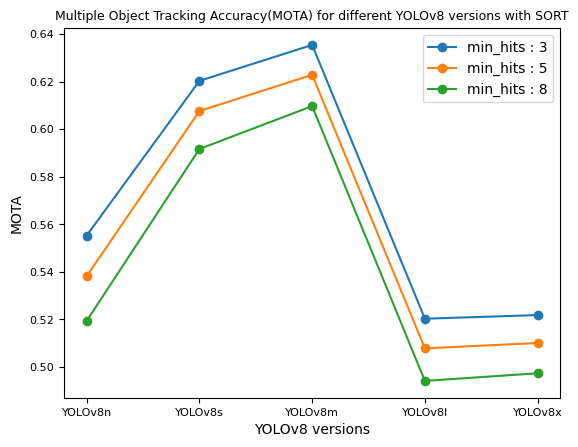

In [31]:
plt.plot('model', 'MOTA', '-o',  data = data_3, label = 'min_hits : 3')
plt.plot('model', 'MOTA', '-o',  data = data_5, label = 'min_hits : 5')
plt.plot('model', 'MOTA', '-o',  data = data_8, label = 'min_hits : 8')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('YOLOv8 versions')
plt.ylabel('MOTA')
plt.title('Multiple Object Tracking Accuracy(MOTA) for different YOLOv8 versions with SORT', fontsize = 9)
plt.legend()
plt.show()

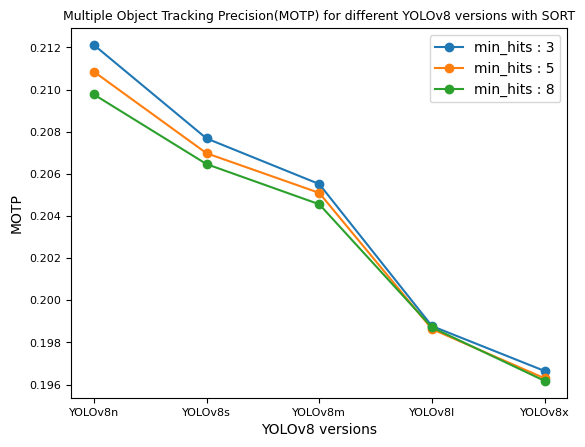

In [32]:
plt.plot('model', 'MOTP', '-o',  data = data_3, label = 'min_hits : 3')
plt.plot('model', 'MOTP', '-o',  data = data_5, label = 'min_hits : 5')
plt.plot('model', 'MOTP', '-o',  data = data_8, label = 'min_hits : 8')
plt.xlabel('YOLOv8 versions')
plt.ylabel('MOTP')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Multiple Object Tracking Precision(MOTP) for different YOLOv8 versions with SORT', fontsize = 9)
plt.legend()
plt.show()